In [ ]:
%config Completer.use_jedi = False

In [ ]:
%matplotlib inline
!pip show tensorflow
!wget -cq https://ti.arc.nasa.gov/c/5 -O naza.zip
!unzip -qqo naza.zip -d battery_data

Name: tensorflow
Version: 2.11.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.9/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl
[naza.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of naza.zip or
        naza.zip.zip, and cannot find naza.zip.ZIP, period.


In [ ]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def load_data(battery):
  mat = loadmat(battery+'.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]
dataset, capacity = load_data('B0005')
pd.set_option('display.max_columns', 10)
print(dataset.head())
dataset.describe()


Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  1.856487          4.191492   
1      1                   24 2008-04-02 15:25:41  1.856487          4.190749   
2      1                   24 2008-04-02 15:25:41  1.856487          3.974871   
3      1                   24 2008-04-02 15:25:41  1.856487          3.951717   
4      1                   24 2008-04-02 15:25:41  1.856487          3.934352   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.004902             24.330034       -0.0006         0.000   0.000  
1         -0.001478             24.325993       -0.0006         4.206  16.781  
2         -2.012528             24.389085       -1.9982         3.062  35.703  
3         -2.

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,1.560345,3.515268,-1.806032,32.816991,1.362700,2.308406,1546.208924
std,45.699687,0.0,0.182380,0.231778,0.610502,3.987515,1.313698,0.800300,906.640295
min,1.000000,24.0,1.287453,2.455679,-2.029098,23.214802,-1.998400,0.000000,0.000000
25%,50.000000,24.0,1.386229,3.399384,-2.013415,30.019392,1.998000,2.388000,768.563000
50%,88.000000,24.0,1.538237,3.511664,-2.012312,32.828944,1.998200,2.533000,1537.031000
75%,127.000000,24.0,1.746871,3.660903,-2.011052,35.920887,1.998200,2.690000,2305.984000
max,168.000000,24.0,1.856487,4.222920,0.007496,41.450232,1.998400,4.238000,3690.234000


In [ ]:
#test data
dataset2, capacity2 = load_data('B0018')
pd.set_option('display.max_columns', 10)
print(dataset2.head())
dataset2.describe()

Total data in dataset:  319
[1, 24, datetime.datetime(2008, 7, 7, 15, 15, 28), 1.8550045207910817, 4.188108651124536, 0.00013066734156636677, 23.8195202516044, 0.0006, 0.0, 0.0]
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-07-07 15:15:28  1.855005          4.188109   
1      1                   24 2008-07-07 15:15:28  1.855005          4.188196   
2      1                   24 2008-07-07 15:15:28  1.855005          3.977432   
3      1                   24 2008-07-07 15:15:28  1.855005          3.961974   
4      1                   24 2008-07-07 15:15:28  1.855005          3.949835   

   current_measured  temperature_measured  current_load  voltage_load    time  
0          0.000131             23.819520        0.0006         0.000   0.000  
1          0.001459             23.828807        0.0006         4.203   9.422  
2         -2.005672             23.844944        1.9988         3.029  19.578  
3         -2.01

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,34866.000000,34866.0,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,59.962657,24.0,1.584405,3.501219,-1.842923,31.083216,1.833923,2.408419,1547.119848
std,37.957008,0.0,0.156427,0.250037,0.552445,3.649983,0.549609,0.744116,908.373277
min,1.000000,24.0,1.341051,2.278634,-2.026719,22.350256,0.000400,0.000000,0.000000
25%,27.000000,24.0,1.428376,3.382813,-2.009485,28.462162,1.998600,2.459000,763.339250
50%,57.000000,24.0,1.605737,3.497088,-2.008341,31.121895,1.998600,2.589000,1537.289500
75%,92.000000,24.0,1.711846,3.662815,-2.007073,33.982822,1.998800,2.751000,2312.964500
max,132.000000,24.0,1.855005,4.193543,0.014306,38.878688,1.999000,4.209000,3434.891000


Text(0.5, 1.0, 'Discharge B0005')

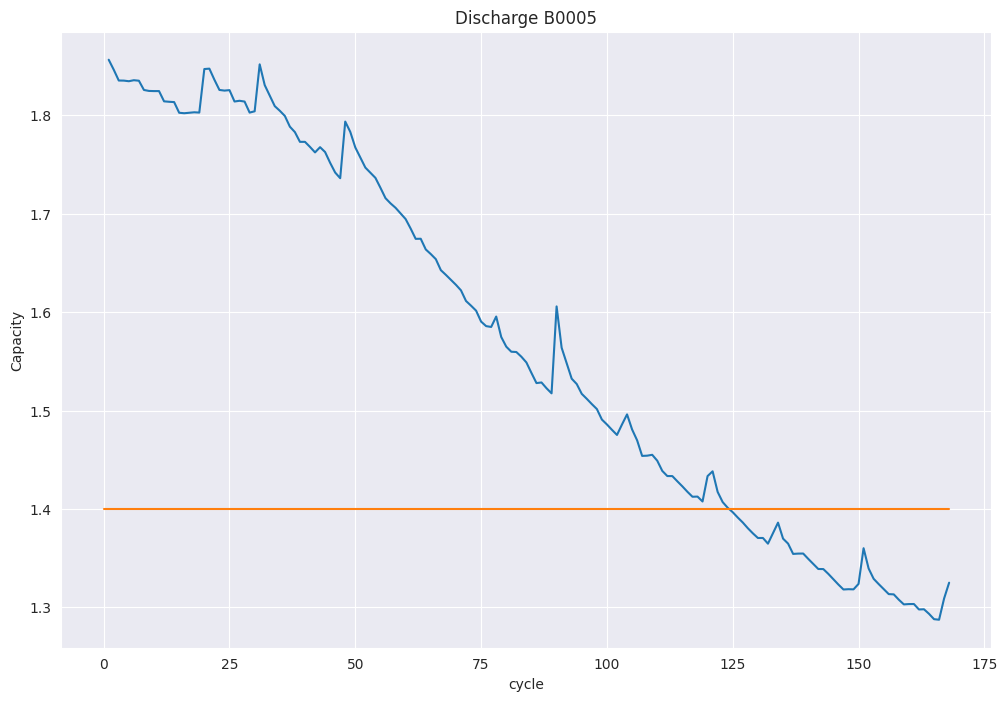

In [ ]:
#for trained data
plot_df = capacity.loc[(capacity['cycle']>=1),['cycle','capacity']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(capacity)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

Text(0.5, 1.0, 'Discharge B0007')

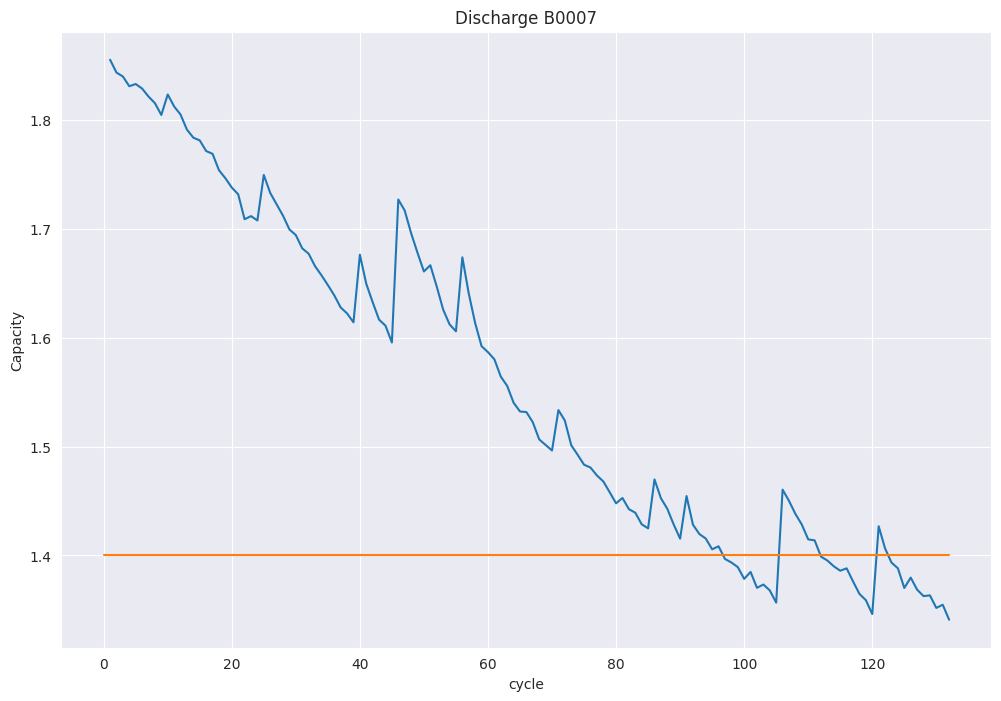

In [ ]:
#for test data
plot_df = capacity2.loc[(capacity2['cycle']>=1),['cycle','capacity']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(capacity2)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0007')

In [ ]:
#train data SOH
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity'])/C
print(dis_ele.head(5))

   cycle            datetime  capacity       SoH
0      1 2008-04-02 15:25:41  1.856487  1.000000
1      2 2008-04-02 19:43:48  1.846327  0.994527
2      3 2008-04-03 00:01:06  1.835349  0.988614
3      4 2008-04-03 04:16:37  1.835263  0.988567
4      5 2008-04-03 08:33:25  1.834646  0.988235


In [ ]:
#test data SOH
attrib=['cycle', 'datetime', 'capacity']
dis_ele2 = capacity2[attrib]
C = dis_ele2['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele2['SoH']=(dis_ele2['capacity'])/C
print(dis_ele2.head(5))

   cycle            datetime  capacity       SoH
0      1 2008-07-07 15:15:28  1.855005  1.000000
1      2 2008-07-07 21:53:06  1.843196  0.993634
2      3 2008-07-08 02:56:08  1.839602  0.991697
3      4 2008-07-08 07:58:55  1.830674  0.986884
4      5 2008-07-08 18:57:48  1.832700  0.987976


Text(0.5, 1.0, 'Discharge B0005')

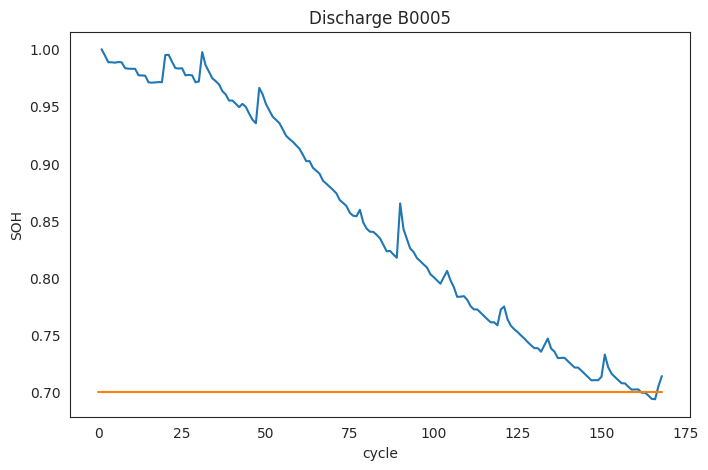

In [ ]:
#plot of Cycles Vs SOH for train data i.e B0005
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SoH']]
sns.set_style("white")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['SoH'])
#Draw threshold
plt.plot([0.,len(capacity)], [0.70, 0.70])
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

Text(0.5, 1.0, 'Discharge B0007')

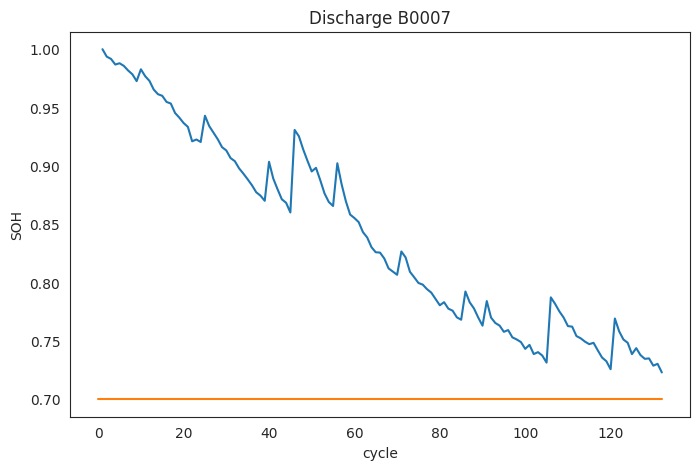

In [ ]:
#plot of Cycles Vs SOH for test data i.e B0007
plot_df = dis_ele2.loc[(dis_ele2['cycle']>=1),['cycle','SoH']]
sns.set_style("white")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['SoH'])
#Draw threshold
plt.plot([0.,len(capacity2)], [0.70, 0.70])
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0007')

In [ ]:
#making datframe for SOH of trained battery dataset B0005
C = dataset['capacity'][0]
soh_train = []
for i in range(len(dataset)):
  soh_train.append([dataset['capacity'][i] / C])
soh_train = pd.DataFrame(data=soh_train, columns=['SoH'])

attribs=['capacity', 'voltage_measured', 'current_measured',
         'temperature_measured', 'current_load', 'voltage_load', 'time']
train_dataset = dataset[attribs]
sc = MinMaxScaler(feature_range=(0,1))
train_dataset = sc.fit_transform(train_dataset)
print(train_dataset.shape)
print(soh_train.shape)

(50285, 7)
(50285, 1)


In [ ]:
C = dataset2['capacity'][0]
soh_test = []
for i in range(len(dataset2)):
  soh_test.append([dataset2['capacity'][i] / C])
soh_test = pd.DataFrame(data=soh_test, columns=['SoH'])

attribs=['capacity', 'voltage_measured', 'current_measured',
         'temperature_measured', 'current_load', 'voltage_load', 'time']
test_dataset = dataset2[attribs]
sc = MinMaxScaler(feature_range=(0,1))
test_dataset = sc.fit_transform(test_dataset)
print(test_dataset.shape)
print(soh_test.shape)

(34866, 7)
(34866, 1)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingRegressor



In [ ]:
x_train=train_dataset
y_train=soh_train
x_test=test_dataset
y_test=soh_test

In [ ]:
pd.DataFrame(y_train)

,SoH
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
50280,0.713756
50281,0.713756
50282,0.713756
50283,0.713756


In [ ]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

#Prediction of test set
y_pred_mlr= mlr.predict(x_test)


print(y_test)
print(y_pred_mlr)
y_test


            SoH
0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
...         ...
34861  0.722937
34862  0.722937
34863  0.722937
34864  0.722937
34865  0.722937

[34866 rows x 1 columns]
[[1.        ]
 [1.        ]
 [1.        ]
 ...
 [0.69348842]
 [0.69348842]
 [0.69348842]]


,SoH
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
34861,0.722937
34862,0.722937
34863,0.722937
34864,0.722937


In [ ]:
y_pred_mlr

array([[1.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.69348842],
       [0.69348842],
       [0.69348842]])

In [ ]:
from sklearn.metrics import r2_score
MAE=metrics.mean_absolute_error(y_test,y_pred_mlr)
MSE=metrics.mean_squared_error(y_test,y_pred_mlr)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred_mlr))
R_squared=r2_score(y_test,y_pred_mlr)*100
print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("R squared value:", R_squared)


MAE: 0.015504872476216909
MSE: 0.0003207336166531798
RMSE: 0.017909037289960055
R squared value: 95.48949306401285


In [ ]:
# GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
# Define the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3)
# Train the model
gbr.fit(x_train,y_train)
# Make predictions on the test data
predictions = gbr.predict(x_test)
# Evaluate the model performance
mse = mean_squared_error(y_test, predictions)
from sklearn.metrics import r2_score
MAE=metrics.mean_absolute_error(y_test,predictions)
MSE=metrics.mean_squared_error(y_test,predictions)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,predictions))
R_squared=r2_score(y_test,predictions)*100
print("MAE:",MAE)
print("MSE:",MSE)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
print("R squared value:", R_squared)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 0.015467079442279135
MSE: 0.00031996082027205036
RMSE:  0.017887448679788025
R squared value: 95.5003609720094


In [ ]:
x_train=train_dataset
y_train=soh_train
x_test=test_dataset
y_test=soh_test

# GaussianProcessRegressor
#Splitting the dataset
#from sklearn.model_selection import train_test_split
#x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8, random_state = 0)
from sklearn.gaussian_process import GaussianProcessRegressor
clf = GaussianProcessRegressor(random_state=42)
clf.fit(x_train,y_train)
pred=clf.predict(x_test[0:1000,:])
mse = mean_squared_error(y_test[0:1000], pred)
from sklearn.metrics import r2_score
MAE=metrics.mean_absolute_error(y_test[0:1000],pred)
MSE=metrics.mean_squared_error(y_test[0:1000],pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test[0:1000],pred))
R_squared=r2_score(y_test[0:1000],pred)*100
print("MAE:",MAE)
print("MSE:",MSE)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
print("R squared value:", R_squared)

In [ ]:
# Import the necessary libraries
#random forest
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import r2_score

# Create a random forest regression model with 100 trees
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Fit the model on the training data
rf_model.fit(x_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(x_test)

MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
R_squared=r2_score(y_test,y_pred)*100
print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("R squared value:", R_squared)


<ipython-input-23-689c4d29612d>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


MAE: 0.015506332586377979
MSE: 0.00032014346853890684
RMSE: 0.017892553438201793
R squared value: 95.4977923723001


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics
import numpy as np


clf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
clf.fit(x_train,y_train)

pred_svr=clf.predict(x_test)

MAE=metrics.mean_absolute_error(y_test,pred_svr)
MSE=metrics.mean_squared_error(y_test,pred_svr)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,pred_svr))
R_squared=r2_score(y_test,pred_svr)*100

print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:", RMSE)
print("R squared value:", R_squared)

MAE: 0.04676620747429714
MSE: 0.002784498838333032
RMSE: 0.052768350725913654
R squared value: 60.841331648966715


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import numpy as np


clf = KNeighborsRegressor(n_neighbors=5)
clf.fit(x_train,y_train)

pred_knn=clf.predict(x_test)

MAE=metrics.mean_absolute_error(y_test,pred_knn)
MSE=metrics.mean_squared_error(y_test,pred_knn)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,pred_knn))
R_squared=r2_score(y_test,pred_knn)*100

print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:", RMSE)
print("R squared value:", R_squared)

MAE: 0.013473809564176925
MSE: 0.0002427595301863636
RMSE: 0.015580742286116011
R squared value: 96.58604995600881


In [ ]:
#adaboost regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
ada_reg = AdaBoostRegressor(n_estimators=100)
print(ada_reg)
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None) 
ada_reg.fit(x_train, y_train)
pred_ada=ada_reg.predict(x_test)

MAE=metrics.mean_absolute_error(y_test,pred_ada)
MSE=metrics.mean_squared_error(y_test,pred_ada)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,pred_ada))
R_squared=r2_score(y_test,pred_ada)*100

print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:", RMSE)
print("R squared value:", R_squared)

AdaBoostRegressor(n_estimators=100)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 0.017930729884009403
MSE: 0.0004683850924691618
RMSE: 0.021642206275450795
R squared value: 93.41305650982127


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=40)
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
mse = mean_squared_error(y_test, pred_dt)
from sklearn.metrics import r2_score
MAE=metrics.mean_absolute_error(y_test,pred_dt)
MSE=metrics.mean_squared_error(y_test,pred_dt)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,pred_dt))
R_squared=r2_score(y_test,pred_dt)*100
print("MAE:",MAE)
print("MSE:",MSE)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
print("R squared value:",R_squared)

MAE: 0.01552196666397157
MSE: 0.0003202680496303227
RMSE:  0.017896034466616417
R squared value: 95.49604037672573
